In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")


In [2]:
# read  daraset
df= pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
# found null values in dataframe 
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Exploratory Data Analysis (EDA):

In [7]:
df.describe() # for numbers data type

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.describe(include='object') # object type

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


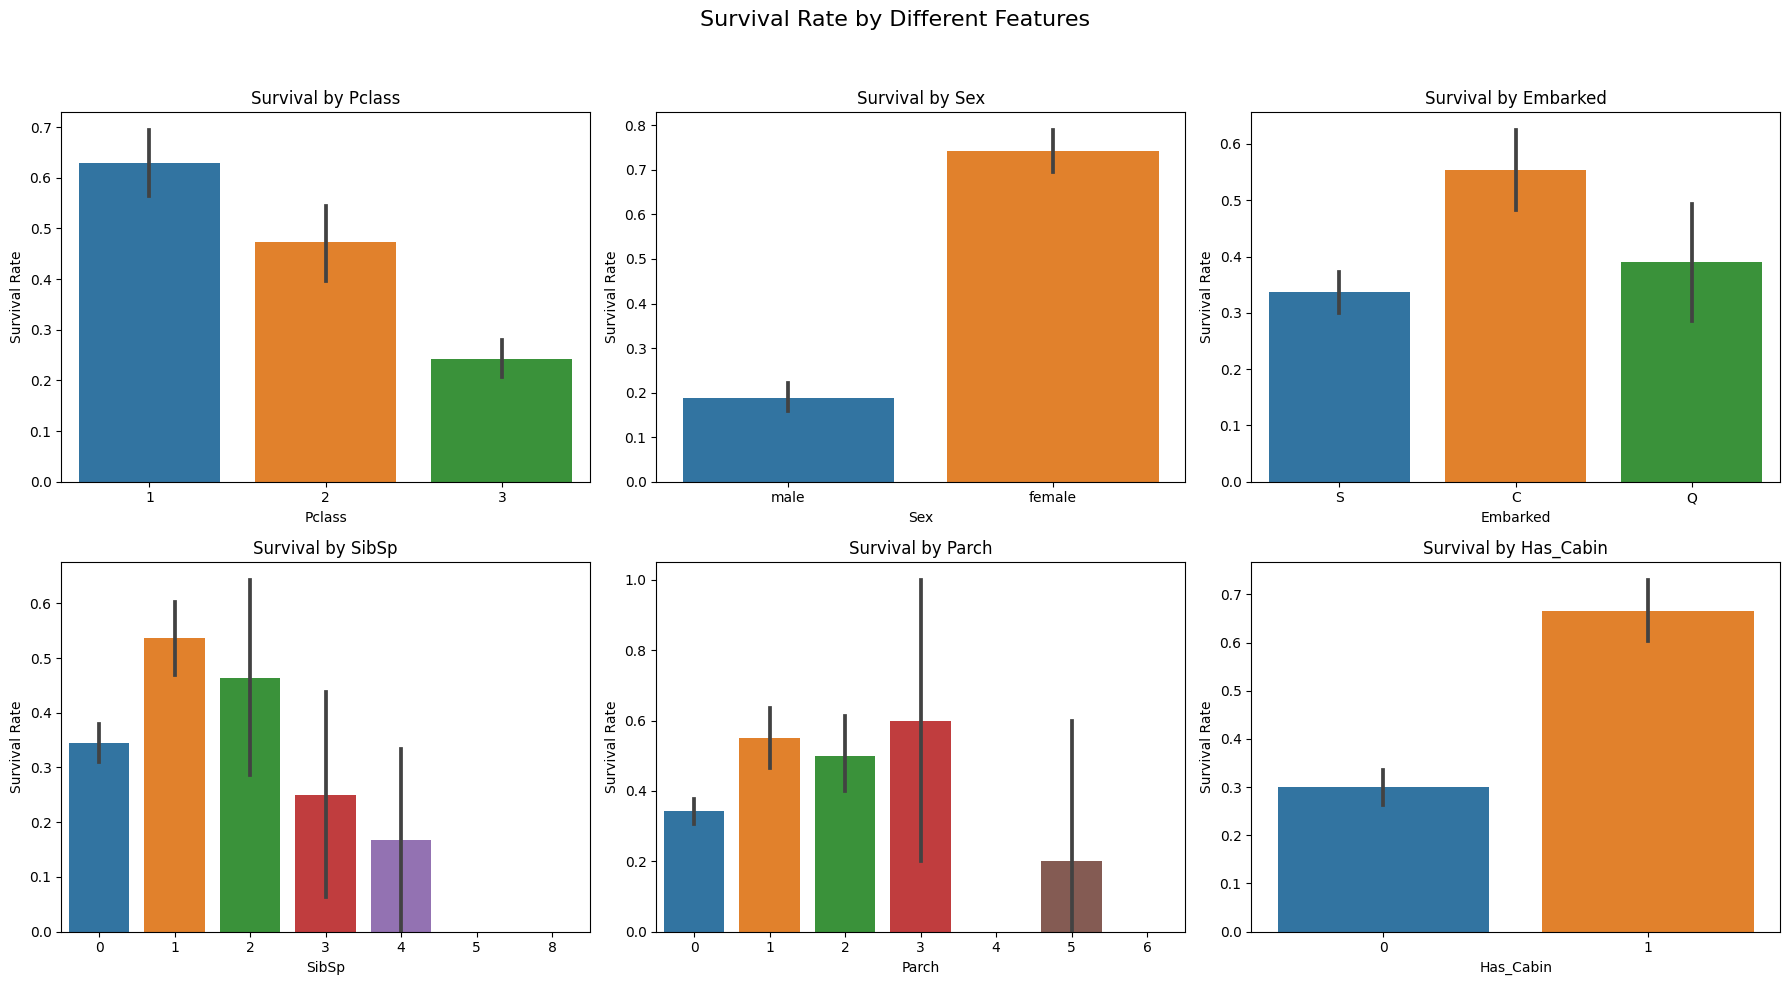

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure Cabin is dropped or you have Has_Cabin column
df['Has_Cabin'] = df['Cabin'].notna().astype(int)  

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Survival Rate by Different Features', fontsize=16)

# Features to analyze
features = ['Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch', 'Has_Cabin']

# Flatten axes for easy iteration
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.barplot(x=feature, y='Survived', data=df, ax=axes[i])
    axes[i].set_ylabel('Survival Rate')
    axes[i].set_xlabel(feature)
    axes[i].set_title(f'Survival by {feature}')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust to fit suptitle
plt.show()

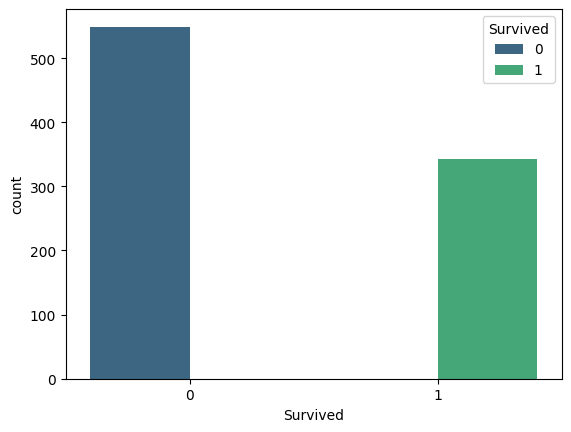

In [10]:
sns.countplot(data=df, x='Survived', hue='Survived', palette='viridis');


### clean data (handle missing values):

In [11]:
df[df['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,0
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,0
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,0
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,0
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,0


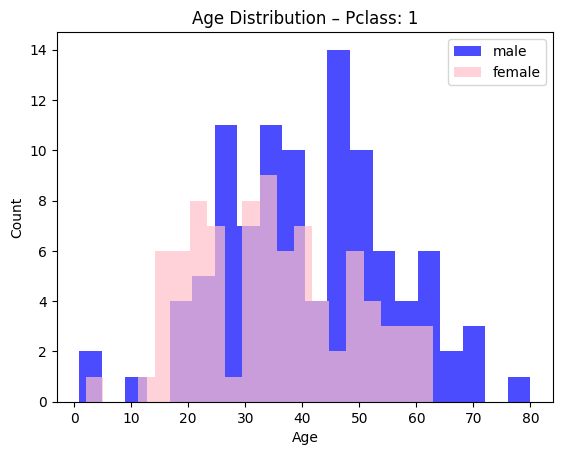

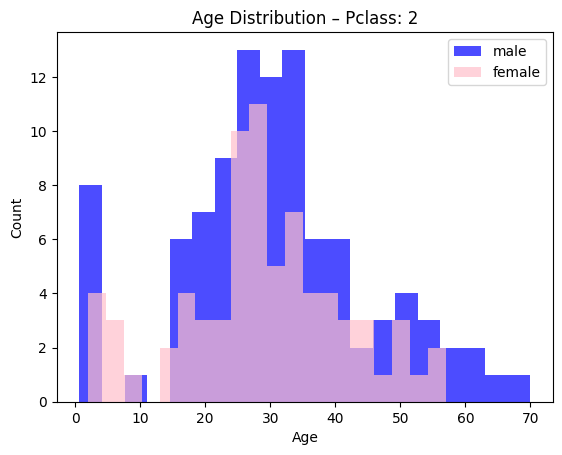

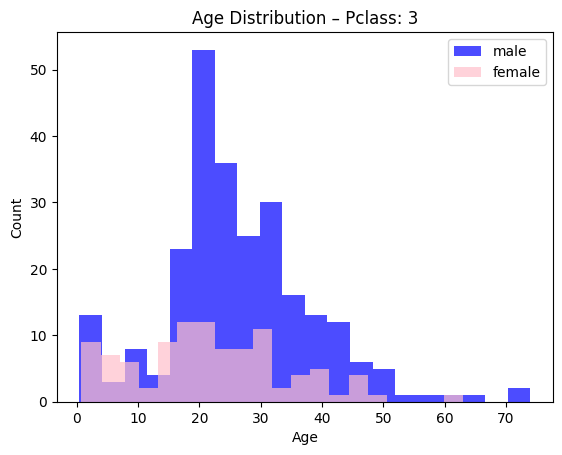

In [12]:
import matplotlib.pyplot as plt

pclassList = sorted(df['Pclass'].unique())
sexList = df['Sex'].unique()  # ['male', 'female']

colors = {'male':'blue', 'female':'pink'}  # ألوان لكل جنس

for pclass in pclassList:
    plt.figure()
    
    for sex in sexList:
        ages = df[(df['Pclass'] == pclass) & (df['Sex'] == sex)]['Age'].dropna()
        plt.hist(ages, bins=20, alpha=0.7, label=sex, color=colors[sex])
    
    plt.title(f'Age Distribution – Pclass: {pclass}')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.legend()
    plt.show()

In [13]:
mean_age = df.loc[(df['Pclass'] == 3) & (df['Sex'] == 'male'), 'Age'].mean()
mean_age


26.507588932806325

In [14]:
for pclass in pclassList:
    for sex in sexList:
        # Calculate the mean Age for the current group and round it
        mean_age = round(df.loc[(df['Pclass'] == pclass) & (df['Sex'] == sex), 'Age'].mean())
        
        # Fill missing Age values in the current group with the calculated mean
        df.loc[(df['Pclass'] == pclass) & (df['Sex'] == sex) & (df['Age'].isna()), 'Age'] = mean_age

In [15]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Has_Cabin        0
dtype: int64

In [16]:
# for cabin I handle by if passenger has or not
df['Has_Cabin'] = df['Cabin'].notna().astype(int)



In [17]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Has_Cabin        0
dtype: int64

In [18]:
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1


In [19]:
# Fill the missing Embarked with the mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [20]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Has_Cabin        0
dtype: int64

In [21]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,27.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0


In [22]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

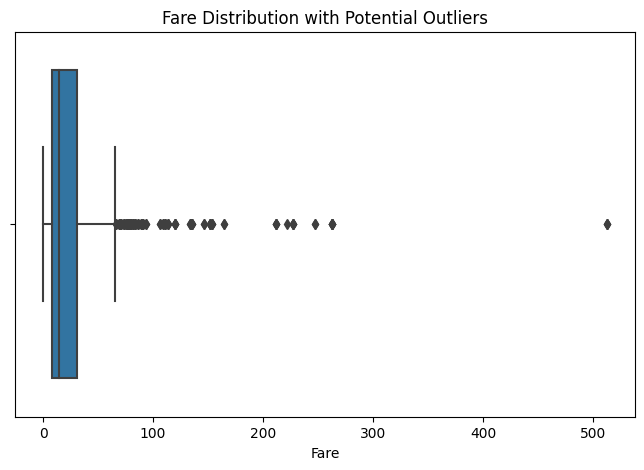

In [23]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Fare'])
plt.title('Fare Distribution with Potential Outliers')
plt.show()

In [24]:
df[df['Fare']>400]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,0
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,1
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,1


### Feature Engineering

In [25]:
# Calculate Q1, Q3 and IQR
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Cap the outliers
df['Fare_no_outlier'] = df['Fare'].apply(lambda x: upper_limit if x > upper_limit else (lower_limit if x < lower_limit else x))

# Check the capped Fare
df['Fare_no_outlier'].describe()

count    891.000000
mean      24.046813
std       20.481625
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max       65.634400
Name: Fare_no_outlier, dtype: float64

In [26]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,Fare_no_outlier
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,65.6344
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,8.0500
5,6,0,3,"Moran, Mr. James",male,27.0,0,0,330877,8.4583,NaN,Q,0,8.4583
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,51.8625
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,21.0750
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,11.1333
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0,30.0708


In [27]:
# Define bins for age
age_bins = [0, 12, 18, 35, 60, 80]  # you can adjust these
age_labels = ['Child', 'Teen', 'Adult', 'Middle', 'Senior']

# Create AgeGroup column
df['Age_group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels).astype('object')

# Define bins for Fare
fare_bins = [0, 7.91, 14.454, 31, 512]  # based on quartiles or custom
fare_labels = ['Low', 'Medium', 'High', 'Very High']

# Create FareGroup column
df['Fare_group'] = pd.cut(df['Fare'], bins=fare_bins, labels=fare_labels).astype('object')

# Create a new column 'FamilySize' by summing SibSp and Parch
df['FamilySize'] = df['SibSp'] + df['Parch']


In [28]:
df_clean = df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin' ], axis=1)
df_clean.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Has_Cabin',
       'Fare_no_outlier', 'Age_group', 'Fare_group', 'FamilySize'],
      dtype='object')

In [29]:
df_clean

,Survived,Pclass,Sex,Age,Fare,Embarked,Has_Cabin,Fare_no_outlier,Age_group,Fare_group,FamilySize
0,0,3,male,22.0,7.2500,S,0,7.2500,Adult,Low,1
1,1,1,female,38.0,71.2833,C,1,65.6344,Middle,Very High,1
2,1,3,female,26.0,7.9250,S,0,7.9250,Adult,Medium,0
3,1,1,female,35.0,53.1000,S,1,53.1000,Adult,Very High,1
4,0,3,male,35.0,8.0500,S,0,8.0500,Adult,Medium,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,0,13.0000,Adult,Medium,0
887,1,1,female,19.0,30.0000,S,1,30.0000,Adult,High,0
888,0,3,female,22.0,23.4500,S,0,23.4500,Adult,High,3
889,1,1,male,26.0,30.0000,C,1,30.0000,Adult,High,0


In [30]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Survived         891 non-null    int64  
 1   Pclass           891 non-null    int64  
 2   Sex              891 non-null    object 
 3   Age              891 non-null    float64
 4   Fare             891 non-null    float64
 5   Embarked         891 non-null    object 
 6   Has_Cabin        891 non-null    int64  
 7   Fare_no_outlier  891 non-null    float64
 8   Age_group        891 non-null    object 
 9   Fare_group       873 non-null    object 
 10  FamilySize       891 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 76.7+ KB


In [31]:
df_clean.describe(include='object')

,Sex,Embarked,Age_group,Fare_group
count,891,891,891,873
unique,2,3,5,4
top,male,S,Adult,High
freq,577,646,514,229


### Encode Categorical Variables:

In [32]:
from sklearn.preprocessing import LabelEncoder

cols_to_encode = ['Sex', 'Embarked', 'Age_group', 'Fare_group']

le_dict = {}  # dictionary to store the encoders so you can inverse later

for col in cols_to_encode:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])  # convert to string for safety
    le_dict[col] = le  # save encoder for each column


In [33]:
print(dict(zip(le_dict['Age_group'].classes_, le_dict['Age_group'].transform(le_dict['Age_group'].classes_))))


{'Adult': 0, 'Child': 1, 'Middle': 2, 'Senior': 3, 'Teen': 4}


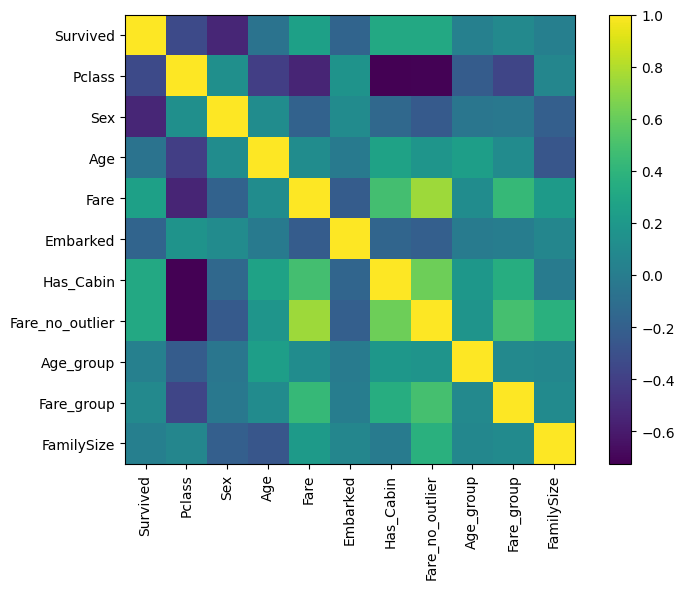

In [34]:

# find the correlation based on the Survived column

corr = df_clean.corr(numeric_only=True)

plt.figure(figsize=(8,6))
plt.imshow(corr, interpolation='nearest')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.tight_layout()
plt.show()

Survived           1.000000
Fare_no_outlier    0.317430
Has_Cabin          0.316912
Fare               0.257307
Fare_group         0.088077
Age_group          0.028786
FamilySize         0.016639
Age               -0.069008
Embarked          -0.167675
Pclass            -0.338481
Sex               -0.543351
Name: Survived, dtype: float64


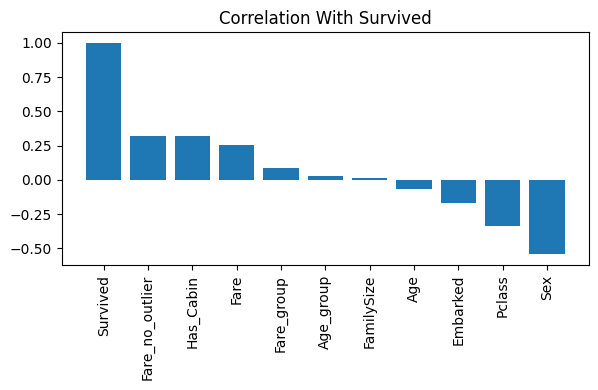

In [35]:
# حساب correlation
corr = df_clean.corr(numeric_only=True)['Survived'].sort_values(ascending=False)

print(corr)

# رسم bar chart
plt.figure(figsize=(6,4))
plt.bar(corr.index, corr.values)
plt.xticks(rotation=90)
plt.title("Correlation With Survived")
plt.tight_layout()
plt.show()


In [36]:
df_clean.head(30)

,Survived,Pclass,Sex,Age,Fare,Embarked,Has_Cabin,Fare_no_outlier,Age_group,Fare_group,FamilySize
0,0,3,1,22.0,7.2500,2,0,7.2500,0,1,1
1,1,1,0,38.0,71.2833,0,1,65.6344,2,3,1
2,1,3,0,26.0,7.9250,2,0,7.9250,0,2,0
3,1,1,0,35.0,53.1000,2,1,53.1000,0,3,1
4,0,3,1,35.0,8.0500,2,0,8.0500,0,2,0
5,0,3,1,27.0,8.4583,1,0,8.4583,0,2,0
6,0,1,1,54.0,51.8625,2,1,51.8625,2,3,0
7,0,3,1,2.0,21.0750,2,0,21.0750,1,0,4
8,1,3,0,27.0,11.1333,2,0,11.1333,0,2,2
9,1,2,0,14.0,30.0708,0,0,30.0708,4,0,1


In [37]:
df_model = df_clean.copy()
df_model

,Survived,Pclass,Sex,Age,Fare,Embarked,Has_Cabin,Fare_no_outlier,Age_group,Fare_group,FamilySize
0,0,3,1,22.0,7.2500,2,0,7.2500,0,1,1
1,1,1,0,38.0,71.2833,0,1,65.6344,2,3,1
2,1,3,0,26.0,7.9250,2,0,7.9250,0,2,0
3,1,1,0,35.0,53.1000,2,1,53.1000,0,3,1
4,0,3,1,35.0,8.0500,2,0,8.0500,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,2,0,13.0000,0,2,0
887,1,1,0,19.0,30.0000,2,1,30.0000,0,0,0
888,0,3,0,22.0,23.4500,2,0,23.4500,0,0,3
889,1,1,1,26.0,30.0000,0,1,30.0000,0,0,0


In [38]:
df_model = df_model.drop(columns=['Age', 'Fare','Age_group', 'FamilySize' ])
df_model

,Survived,Pclass,Sex,Embarked,Has_Cabin,Fare_no_outlier,Fare_group
0,0,3,1,2,0,7.2500,1
1,1,1,0,0,1,65.6344,3
2,1,3,0,2,0,7.9250,2
3,1,1,0,2,1,53.1000,3
4,0,3,1,2,0,8.0500,2
...,...,...,...,...,...,...,...
886,0,2,1,2,0,13.0000,2
887,1,1,0,2,1,30.0000,0
888,0,3,0,2,0,23.4500,0
889,1,1,1,0,1,30.0000,0


### Modeling Preparation Phase

In [39]:
from sklearn.model_selection import train_test_split

# Features and target
X = df_model.drop('Survived', axis=1)  # all columns except target
y = df_model['Survived']               # target column

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [40]:
X_train.shape, y_train.shape

((712, 6), (712,))

In [41]:
X_test.shape, y_test.shape

((179, 6), (179,))

In [42]:
X_train

,Pclass,Sex,Embarked,Has_Cabin,Fare_no_outlier,Fare_group
692,3,1,2,0,56.4958,3
481,2,1,2,0,0.0000,4
527,1,1,2,1,65.6344,3
855,3,0,2,0,9.3500,2
801,2,0,2,0,26.2500,0
...,...,...,...,...,...,...
359,3,0,1,0,7.8792,1
258,1,0,0,0,65.6344,4
736,3,0,2,0,34.3750,3
462,1,1,2,1,38.5000,3


In [43]:
# Example for scaling for only X_tarin
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train['Fare_no_outlier'] = scaler.fit_transform(X_train['Fare_no_outlier'].values.reshape(-1, 1))

X_train.head()

,Pclass,Sex,Embarked,Has_Cabin,Fare_no_outlier,Fare_group
692,3,1,2,0,1.587890,3
481,2,1,2,0,-1.168968,4
527,1,1,2,1,2.033832,3
855,3,0,2,0,-0.712711,2
801,2,0,2,0,0.111968,0


### Build the model:

In [44]:
# 1. Import required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# ---------------- Decision Tree Classifier ----------------
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Metrics
print(f"Decision Tree Accuracy:  {accuracy_score(y_test, y_pred_tree)  *100:.2f}%")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))


Decision Tree Accuracy:  77.65%
Confusion Matrix:
 [[105   5]
 [ 35  34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.95      0.84       110
           1       0.87      0.49      0.63        69

    accuracy                           0.78       179
   macro avg       0.81      0.72      0.73       179
weighted avg       0.80      0.78      0.76       179



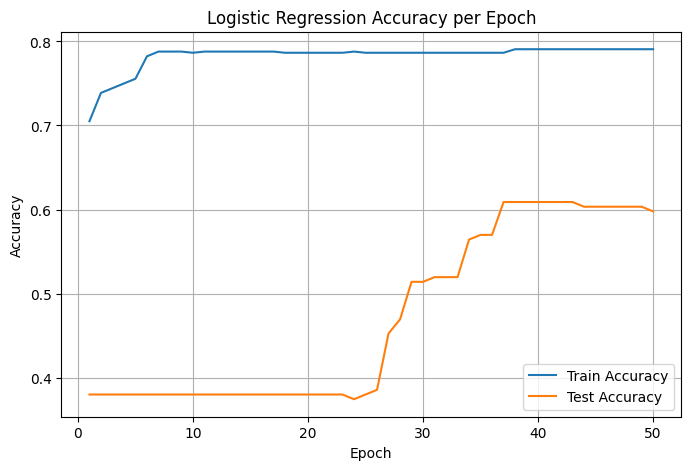

Logistic Regression Accuracy:  77.65%
Confusion Matrix:
 [[105   5]
 [ 35  34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.95      0.84       110
           1       0.87      0.49      0.63        69

    accuracy                           0.78       179
   macro avg       0.81      0.72      0.73       179
weighted avg       0.80      0.78      0.76       179



In [45]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Use logistic regression with SGD (simulates epochs)
sgd_model = SGDClassifier(loss='log', max_iter=1, learning_rate='constant', eta0=0.01, random_state=42, warm_start=True)

epochs = 50
train_acc = []
test_acc = []

for epoch in range(epochs):
    sgd_model.fit(X_train, y_train)  # fit for 1 iteration
    y_train_pred = sgd_model.predict(X_train)
    y_test_pred = sgd_model.predict(X_test)
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

# Plot accuracy per epoch
plt.figure(figsize=(8,5))
plt.plot(range(1, epochs+1), train_acc, label='Train Accuracy')
plt.plot(range(1, epochs+1), test_acc, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Accuracy per Epoch')
plt.legend()
plt.grid(True)
plt.show()

# Metrics

print(f"Logistic Regression Accuracy:  {accuracy_score(y_test, y_pred_tree)  *100:.2f}%")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))


In [46]:
coefs = sgd_model.coef_[0]

feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': np.abs(coefs)
}).sort_values(by='importance', ascending=False)

print(feature_importance.head(10))

           feature  importance
1              Sex    2.519224
3        Has_Cabin    1.094156
0           Pclass    0.406956
2         Embarked    0.219327
4  Fare_no_outlier    0.199939
5       Fare_group    0.119915


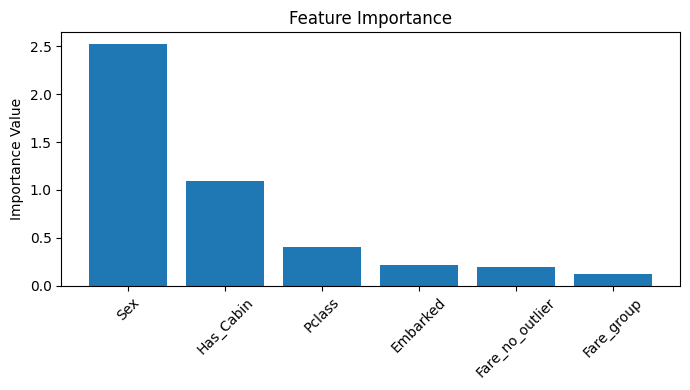

In [47]:
import matplotlib.pyplot as plt

# your dataframe (rename to something like df_imp)
df_imp = feature_importance.copy()

plt.figure(figsize=(7,4))
plt.bar(df_imp['feature'], df_imp['importance'])
plt.xticks(rotation=45)
plt.title("Feature Importance")
plt.ylabel("Importance Value")
plt.tight_layout()
plt.show()

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print(f"KNN Accuracy:  {accuracy_score(y_test, y_pred_tree)  *100:.2f}%")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


KNN Accuracy:  77.65%
Confusion Matrix:
 [[106   4]
 [ 35  34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.96      0.84       110
           1       0.89      0.49      0.64        69

    accuracy                           0.78       179
   macro avg       0.82      0.73      0.74       179
weighted avg       0.81      0.78      0.76       179



precision    recall  f1-score   support

           0       0.78      0.91      0.84       110
           1       0.80      0.58      0.67        69

In [49]:
# 1. Import required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ---------------- Random Forest Classifier ----------------
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Metrics
print(f"Random Forest Accuracy:  {accuracy_score(y_test, y_pred_rf) * 100:.2f}%")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy:  77.09%
Confusion Matrix:
 [[103   7]
 [ 34  35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.94      0.83       110
           1       0.83      0.51      0.63        69

    accuracy                           0.77       179
   macro avg       0.79      0.72      0.73       179
weighted avg       0.78      0.77      0.76       179



In [50]:
# 1. Import required libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ---------------- SVM Classifier ----------------
svm_model = SVC(kernel='linear', random_state=42)  # تقدر تغير kernel لو تبغى
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Metrics
print(f"SVM Accuracy:  {accuracy_score(y_test, y_pred_svm) * 100:.2f}%")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))



SVM Accuracy:  77.65%
Confusion Matrix:
 [[94 16]
 [24 45]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.82       110
           1       0.74      0.65      0.69        69

    accuracy                           0.78       179
   macro avg       0.77      0.75      0.76       179
weighted avg       0.77      0.78      0.77       179



In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [50, 100, 200 ],  # number of trees
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [ 'sqrt', 'log2']
}



# Initialize Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,  # number of trees
    max_depth=None,    # depth of trees
    random_state=42
)

grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,             # 5-fold cross-validation
    n_jobs=-1,        # use all cores
    verbose=2,
    scoring='accuracy'
)



grid_search.fit(X_train, y_train)


best_rf = grid_search.best_estimator_
print("\nBest Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)


y_pred_rf = best_rf.predict(X_test)

# Evaluate


print(f"Random Forest Accuracy:  {accuracy_score(y_test, y_pred_tree)  *100:.2f}%")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))





Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n